<a href="https://colab.research.google.com/github/AndreMaulanaMustofa/PCVK_Genap_2023/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
import os
import glob
from google.colab.patches import cv2_imshow
from math import log10, sqrt
import math

In [ ]:
# Load gambar
img = cv2.imread('/content/drive/MyDrive/Andre/cat.jpg')

# Membuat folder output jika belum ada
output_dir = '/content/drive/MyDrive/Andre/Noise'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Simpan gambar yang telah ditambahkan noise sebanyak 100 kali
for i in range(1, 101):
    # Tambahkan noise pada gambar
    noise = np.random.normal(0, i, img.shape)
    noisy_img = np.clip(img + noise, 0, 255).astype(np.uint8)

    # Simpan gambar
    filename = os.path.join(output_dir, f'noise{i}.jpg')
    cv2.imwrite(filename, noisy_img)

print('Proses selesai.')

PSNR

Hasil MSE  1.5461333120473288
Nilai PSNR adalah  46.23833423555691 (dB)


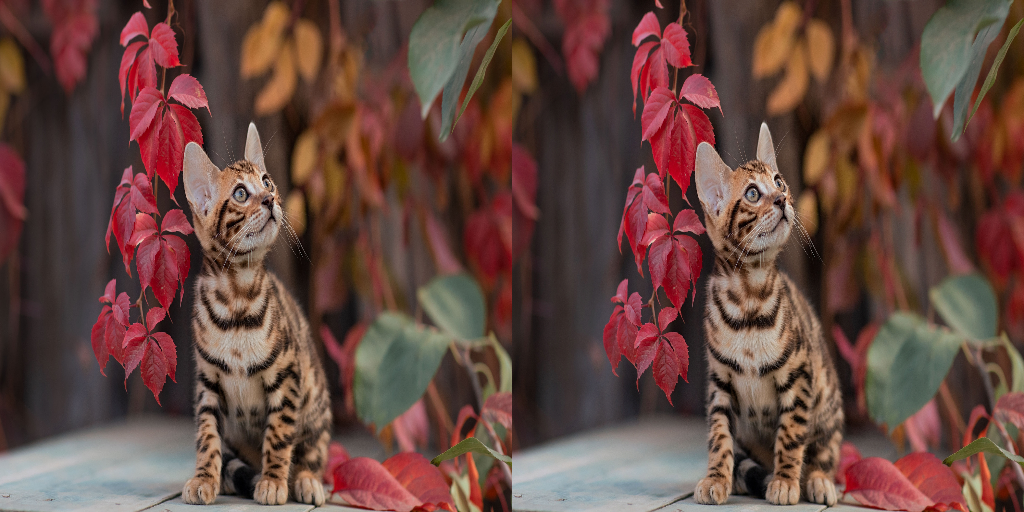

In [ ]:
original = cv.imread('/content/drive/MyDrive/Andre/cat.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Andre/Noise/*'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # jumlah citra array yang di average
for i in range(noise_number):
    if i == 0 :
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    print('Hasil MSE ', mse)
    psnr = 20* log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah ', psnr, '(dB)')

# Resize the images for display
original = cv.resize(original, (512, 512))
compressed = cv.resize(compressed, (512, 512))

cat_frame = cv.hconcat((original, compressed))
cv2_imshow(cat_frame)

Hasil MSE  100.98305161640995
Psnr value 28.08831870324022 (dB)


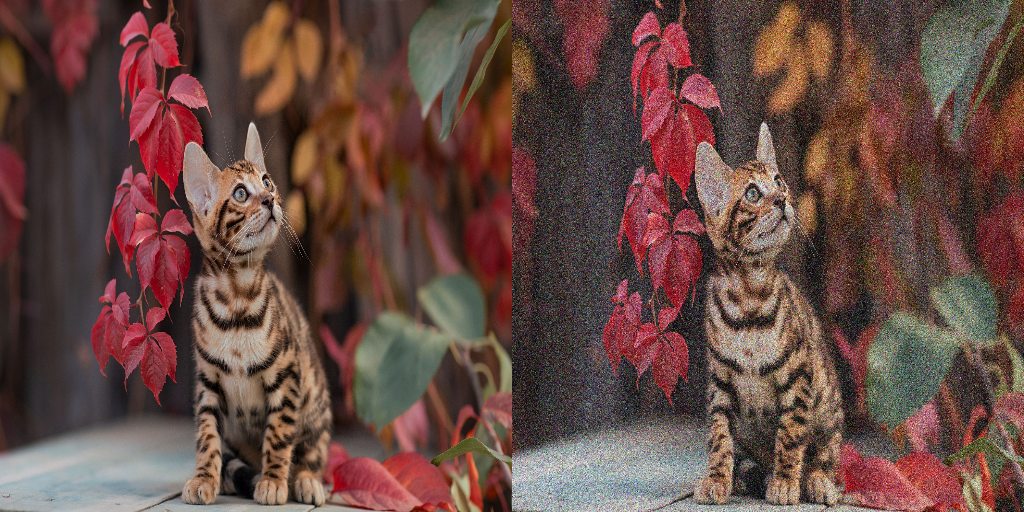

In [ ]:
# Jumlah Citra 60

original = cv.imread('/content/drive/MyDrive/Andre/Noise/noise1.jpg')
contrast = cv.imread('/content/drive/MyDrive/Andre/Noise/noise59.jpg', 1)

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    print('Hasil MSE ', mse)
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d = psnr(original, contrast)
print('Psnr value',d,'(dB)')

original_size = cv.resize(original, (512, 512))
contrast_size = cv.resize(contrast, (512, 512))

final_frame = cv.hconcat((original_size, contrast_size))
cv2_imshow(final_frame)

In [ ]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
      
  return new_image

In [ ]:
img = cv.imread('/content/drive/MyDrive/Andre/cat.jpg')

img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

img_resize = cv.resize(img_gray, (512, 512))

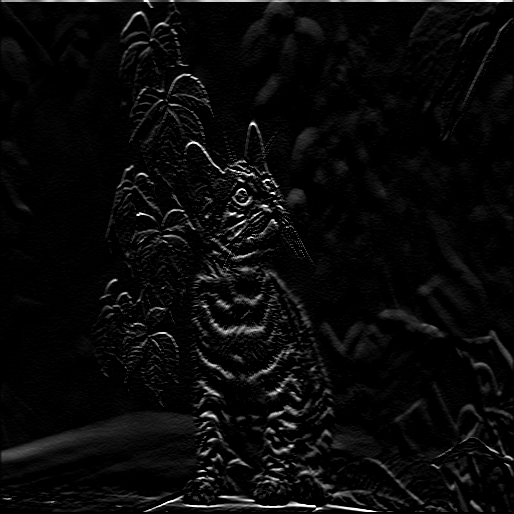

In [ ]:
kernel_prewitt = np.array([[-1,-1,-1],
                         [0,0,0],
                         [1,1,1]])

cv2_imshow(convolution2d(img_resize, kernel_prewitt, 1, 2))